# Summary

Sections:
- Ratio of trainning set
- Top Charsets
- Top sender email domain
- Range of email sent date
- Range for the lenght of email subject
- Range for the lenght of email body
- No. of URLs found in message body
- Features correlation matrix
- Pairplot 


In [30]:
from datetime import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [31]:
enron_df = pd.read_csv('datasets/explored/enron-emails-explored.csv')
mal_df = pd.read_csv('datasets/explored/malicious-emails-explored.csv')

enron_df represent the legitimate datasets and mal_df is the opposite of enron_df which is the malicious part of the datasets

In [32]:
import random

part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(frac=1, ignore_index=True, random_state=rand)

## Ratio of the training set

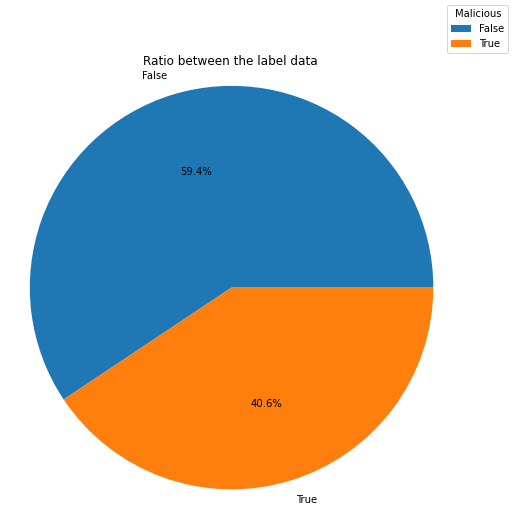

In [33]:
df = training_set.groupby('malicious').size()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df.values, labels=df.index,  autopct='%1.1f%%')
ax.axis('equal') 
fig.set_facecolor('white')
fig.legend(df.index, title="Malicious")

plt.title("Ratio between the label data")
plt.show()

# Top Charsets

In [96]:
def getPieChartCharset(series):
    used_charset = series.groupby('charset', dropna=False).charset.count()
    used_charset = used_charset.sort_values(ascending=False)
    top_x = used_charset[:5]
    others = pd.Series(used_charset[5:].sum(), index=['others'])
    top_charsets = pd.concat([top_x, others])
    top_charsets.rename = "Top Charsets"
    
    fig, ax = plt.subplots(figsize=(20, 10))
    top_charsets.plot(kind='pie', fontsize=20, ylabel='Top Charsets',subplots=True, ax=ax)
    fig.set_facecolor('white')
    plt.show()

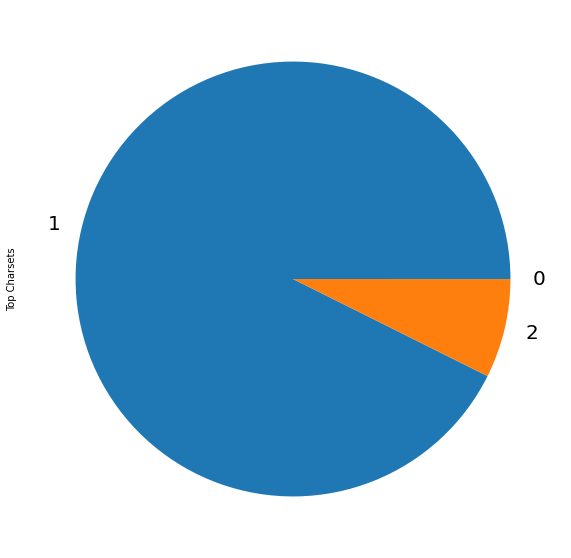

In [97]:
getPieChartCharset(enron_df)

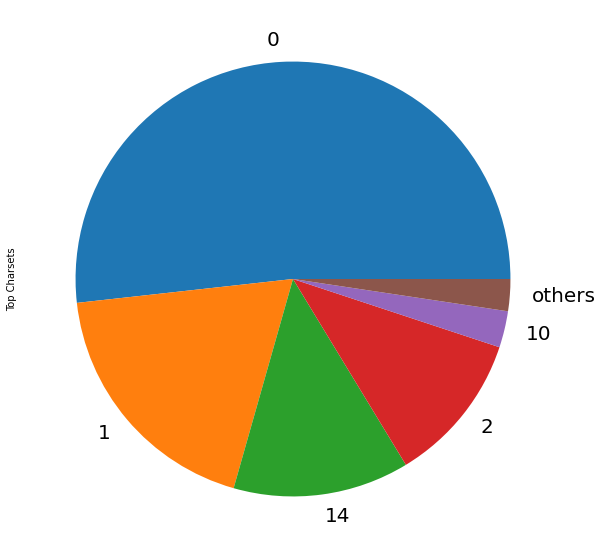

In [98]:
getPieChartCharset(mal_df)

# Top Domain used to send email

In [75]:
def getPieChartDomain(series):
    top_domain = series.groupby('from_domain', dropna=False).from_domain.count()
    top_domain = top_domain.sort_values(ascending=False)
    top_x = top_domain[:5]
    others = pd.Series(top_domain[5:].sum(), index=['others'])
    top_domain = pd.concat([top_x, others])
    top_domain.rename = "Top Charsets"
    top_domain.plot(kind='pie', figsize=(7,7), fontsize=16, ylabel='Top 5 Email Domain',subplots=True, legend=True)

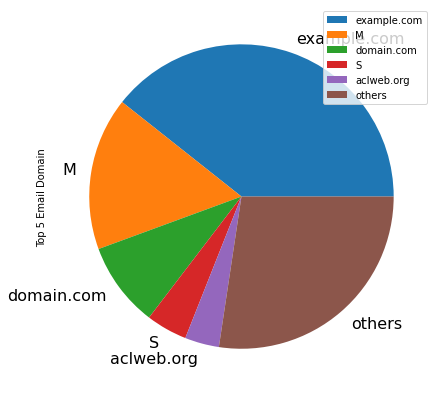

In [76]:
getPieChartDomain(mal_df)

the figure above is the proportion of email domain that the sender used on the malicious datasets

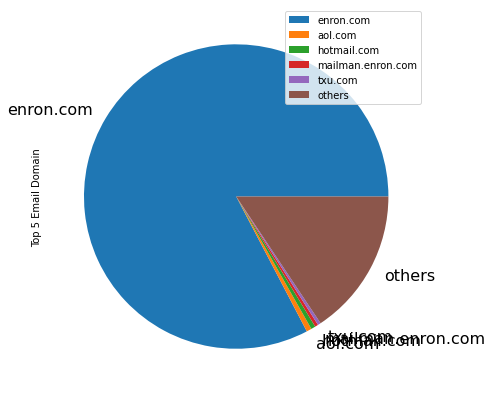

In [77]:
getPieChartDomain(enron_df)

in comparison to the malicious dataset, the legitimate datasets represented by the figure above is less diverse. Reason being that this dataset are source from an internal exchange from a company

## Range of periods when the email is send

In [78]:
date = mal_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

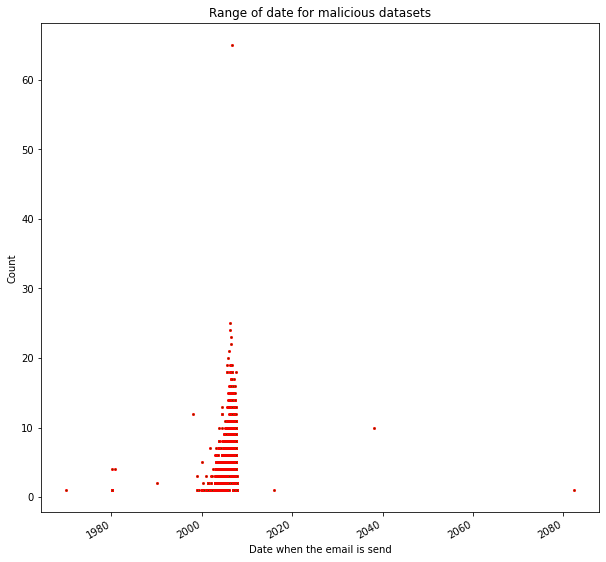

In [79]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Date when the email is send')
plt.title('Range of date for malicious datasets')
plt.show()

In [80]:
date = enron_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

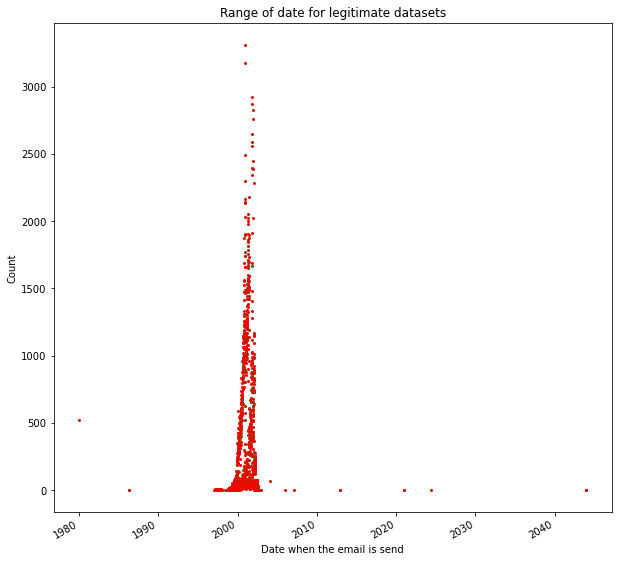

In [81]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)

plt.ylabel('Count')
plt.title('Range of date for legitimate datasets')
plt.xlabel('Date when the email is send')
plt.show()

In the legitimate datasets, we can see some data that are not whithin the actual range of the datasets. 

## Lenght of email subject

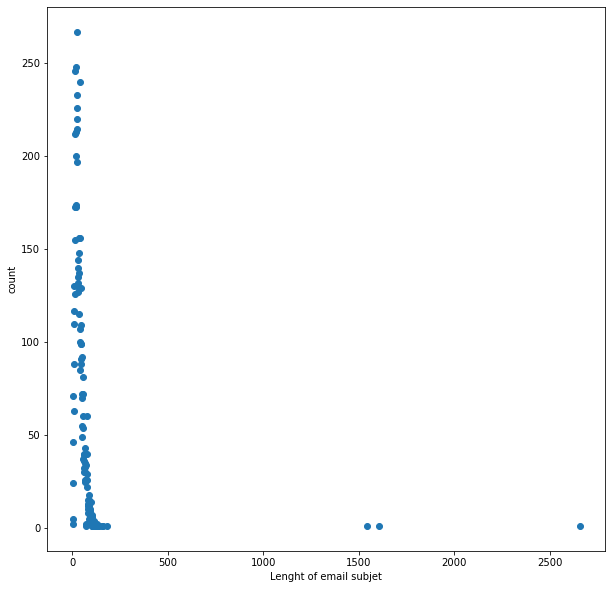

In [82]:
subject = mal_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

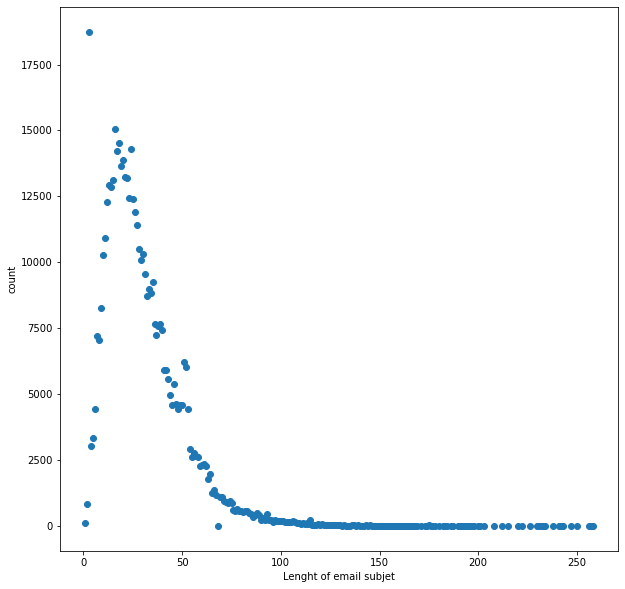

In [83]:
subject = enron_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

## Comparison Length of email body

In [84]:
import seaborn as sns

In [85]:
training_set['body_len'] = training_set.body.apply(lambda x: len(x))
s = training_set[['body_len', 'malicious']]

In [86]:
s.groupby('malicious').mean()

,body_len
malicious,
False,1813.480414
True,5273.668717


Text(0.5, 1.0, 'Comparison the lenght of Body (0 - 10k)')

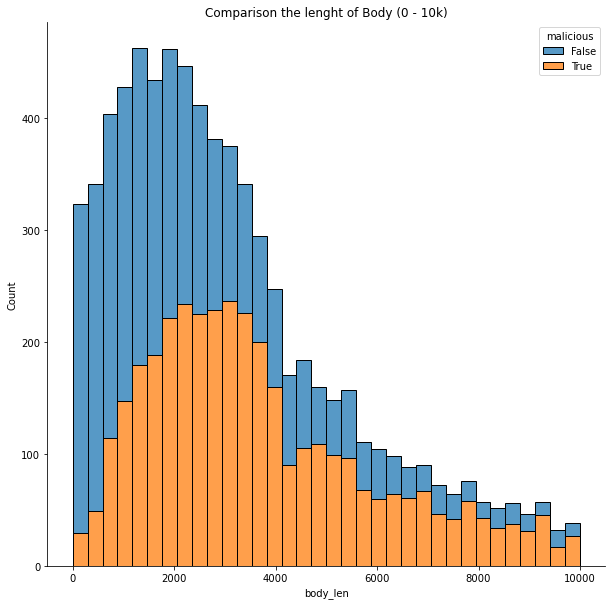

In [87]:
df = s[s.body_len < 10000].groupby(['malicious', 'body_len']).size()

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(fig)
sns.histplot(df, x='body_len', hue='malicious', multiple='stack')
plt.title('Comparison the lenght of Body (0 - 10k)')

Text(0.5, 1.0, 'Comparison the lenght of Body (10k - 50k)')

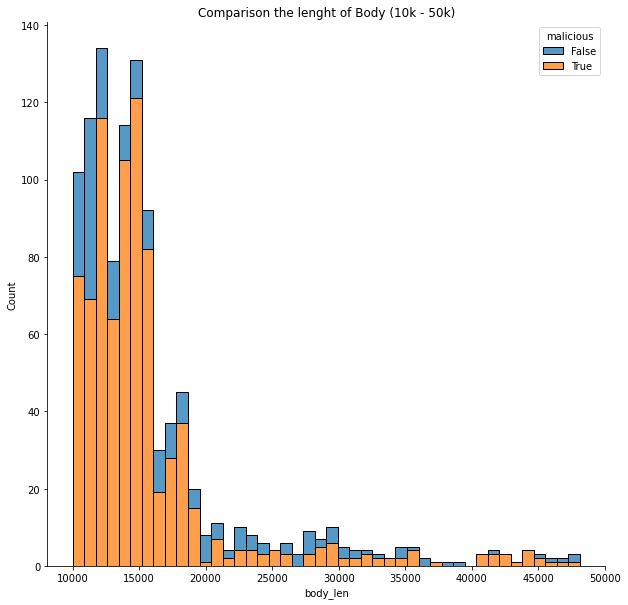

In [88]:
df = s[(s.body_len > 10000) & (s.body_len < 50000)].groupby(['malicious', 'body_len']).size()

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(fig)
sns.histplot(df, x='body_len', hue='malicious', multiple='stack')
plt.title('Comparison the lenght of Body (10k - 50k)')

Text(0.5, 1.0, 'Comparison the lenght of Body (50k)')

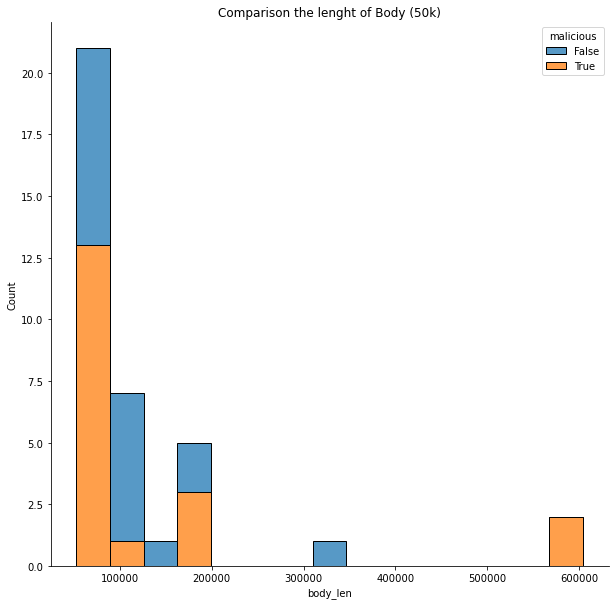

In [89]:
df = s[(s.body_len > 50000)].groupby(['malicious', 'body_len']).size()

fig, ax = plt.subplots(figsize=(10, 10))
sns.despine(fig)
sns.histplot(df, x='body_len', hue='malicious', multiple='stack')
plt.title('Comparison the lenght of Body (50k)')

## No of URLs found in message body

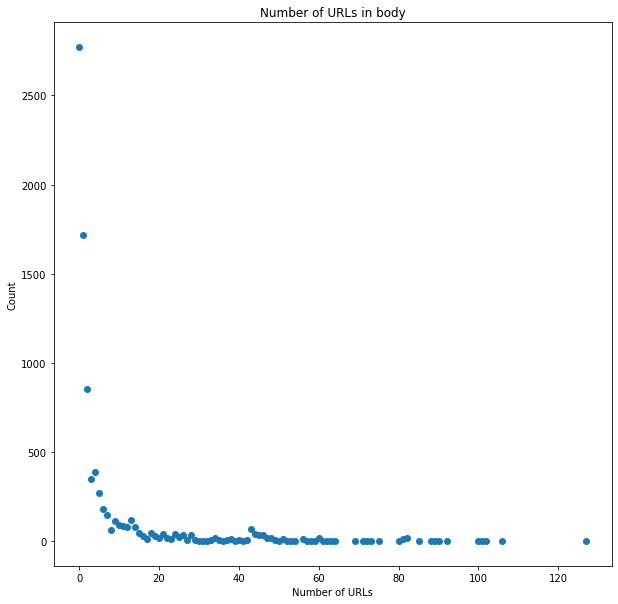

In [90]:
temp = mal_df.URLs_in_message.groupby(mal_df.URLs_in_message.values).count()
y = temp
x = temp.index 

fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
fig.set_size_inches(10,10)
plt.title('Number of URLs in body')
plt.ylabel('Count')
plt.xlabel('Number of URLs')
plt.show()

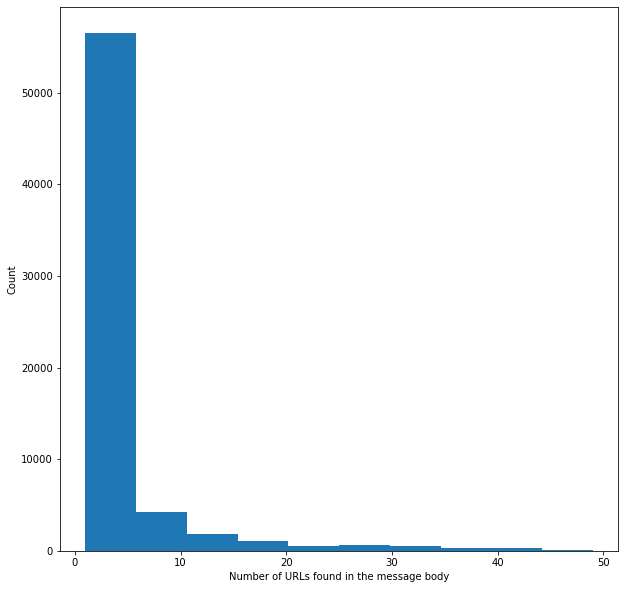

In [91]:
df = enron_df[(enron_df.URLs_in_message > 0) & (enron_df.URLs_in_message < 50)]
x = df.URLs_in_message.values
# y = df.URLs_in_message

fig, ax = plt.subplots()
ax.hist(x)
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()

# Correlation Matrix

In [92]:
import random


part_1 = enron_df.sample(11871, ignore_index=True, random_state=1)
part_2 = mal_df
rand = round(random.random())

training_set = (pd.concat([part_1, part_2], ignore_index=True)).sample(
    frac=1, ignore_index=True, random_state=rand)

In [93]:
features = [
    'content_type',
    'content_transfer_encoding',
    'charset',
    'html',
    'javascript',
    'css',
    'html_form',
    'html_iframe',
    'URLs_in_message',
    'subject_len',
    'subject_entropy',
    'body_entropy',
    'attachement',
    'malicious'
]

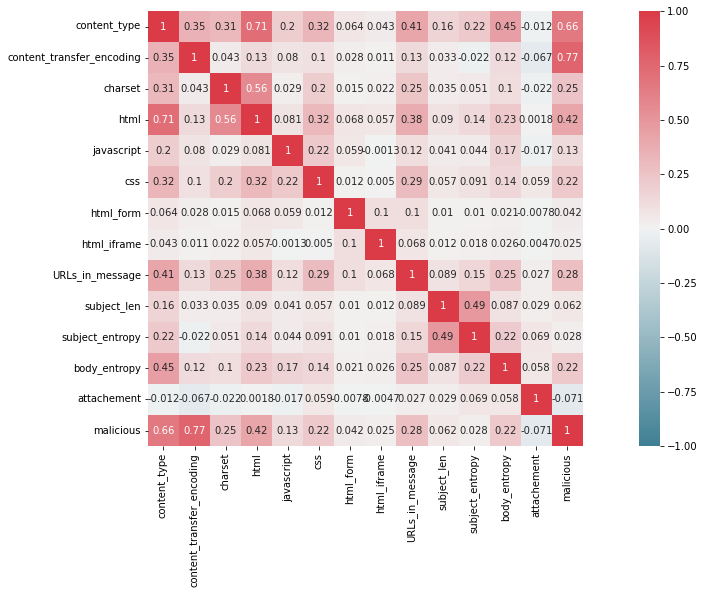

In [94]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 8))
corr = training_set[features].corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

# pairplot

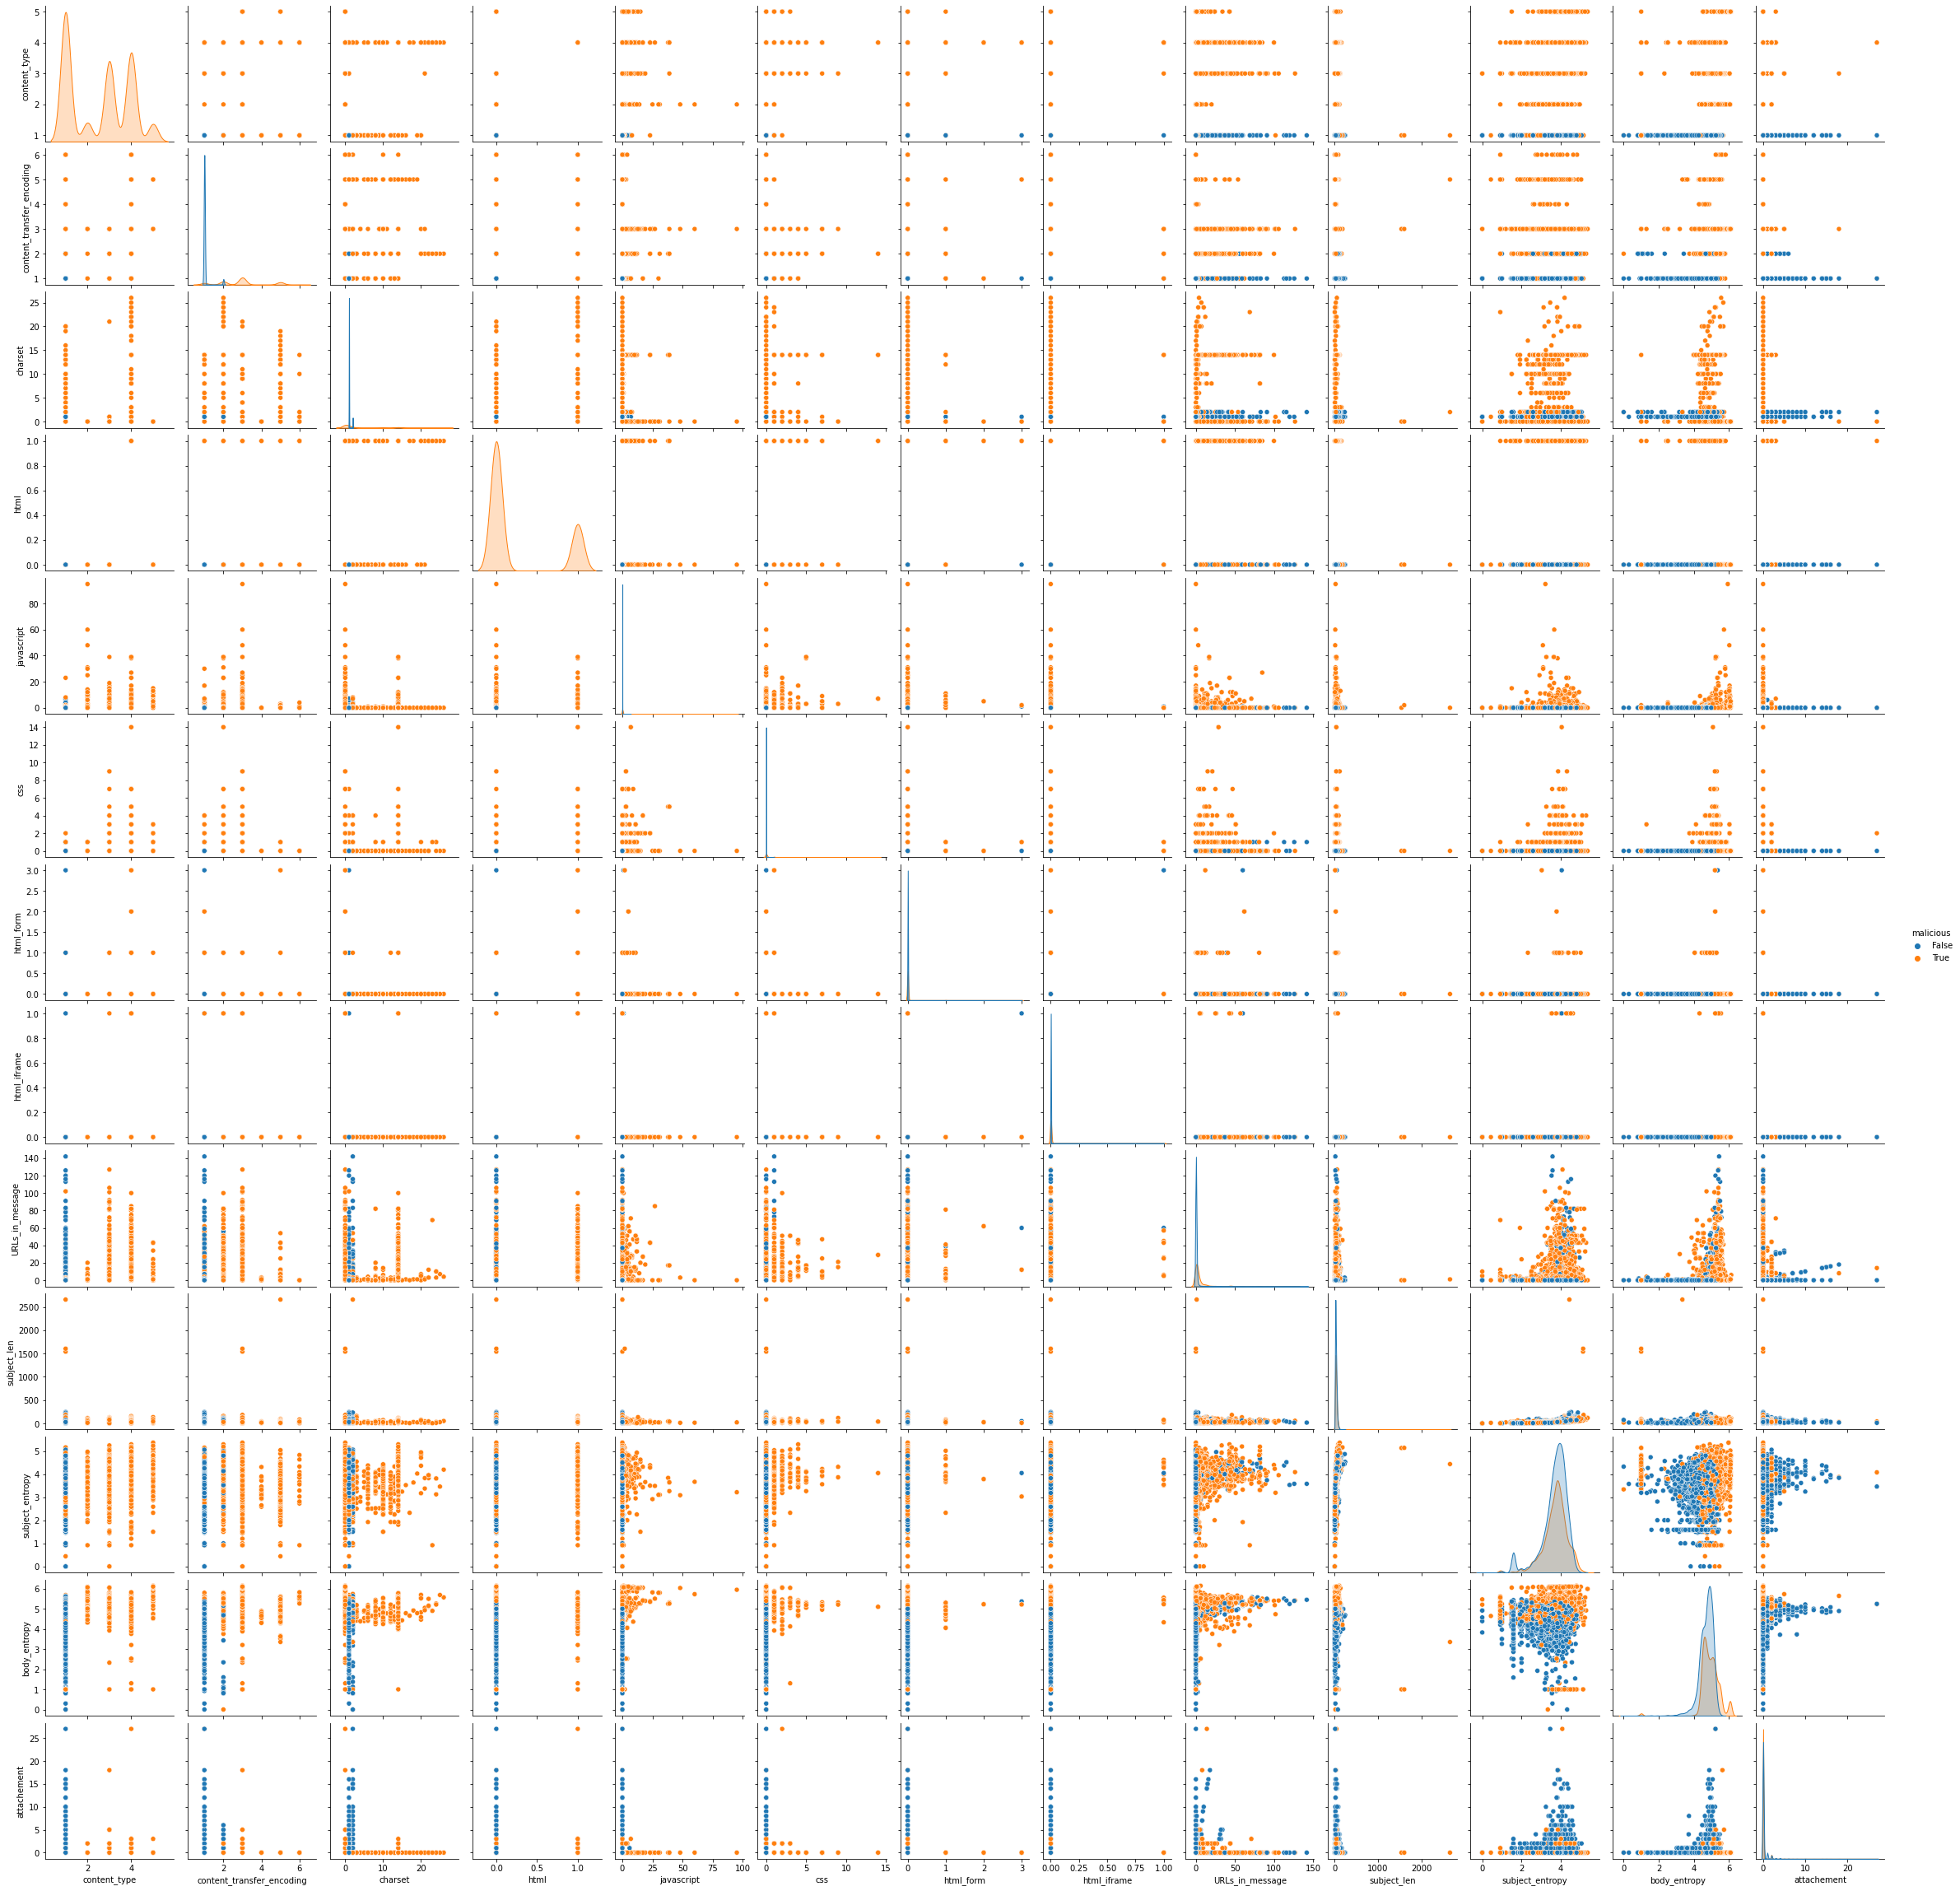

In [95]:
sns.pairplot(training_set[features], hue='malicious')